In [1]:
# Sagar Sahu
# IBM Quantum Challenge 2024- Lab 3


# Part 1: AI-Powered Transpilation

!pip install qiskit[visualization]==1.0.2
!pip install qiskit_ibm_runtime
!pip install qiskit_aer
!pip install graphviz
!pip install qiskit-transpiler-service

import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import EfficientSU2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_transpiler_service.transpiler_service import TranspilerService

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.3 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=88aff55ef0b36ddd15881a85320a2c53c7b24684e0be260244aa3953ef7fa32f
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 9.6 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - 

Original circuit -> Depth: 65, CNOTs: 61


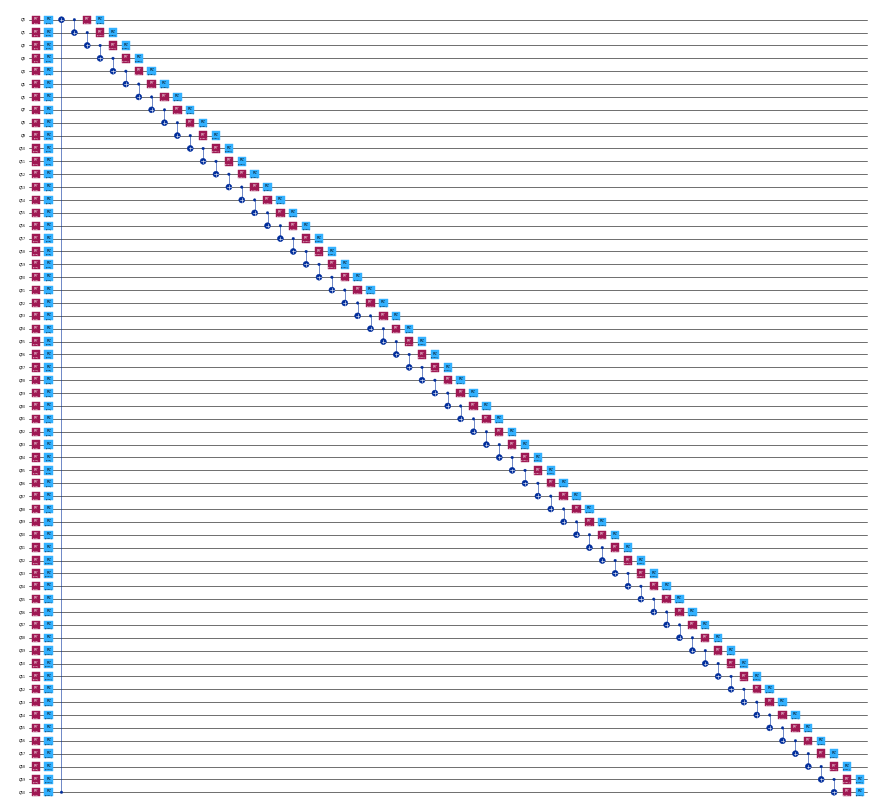

In [2]:
# creating the circuit
NUM_QUBITS = 61
circuit = EfficientSU2(NUM_QUBITS, entanglement="circular", reps=1).decompose()

print(f"Original circuit -> Depth: {circuit.depth()}, CNOTs: {circuit.num_nonlocal_gates()}")
circuit.draw(fold=-1, output="mpl", style="iqp", scale=0.2)

Transpiled without AI -> Depth: 1438, CNOTs: 376


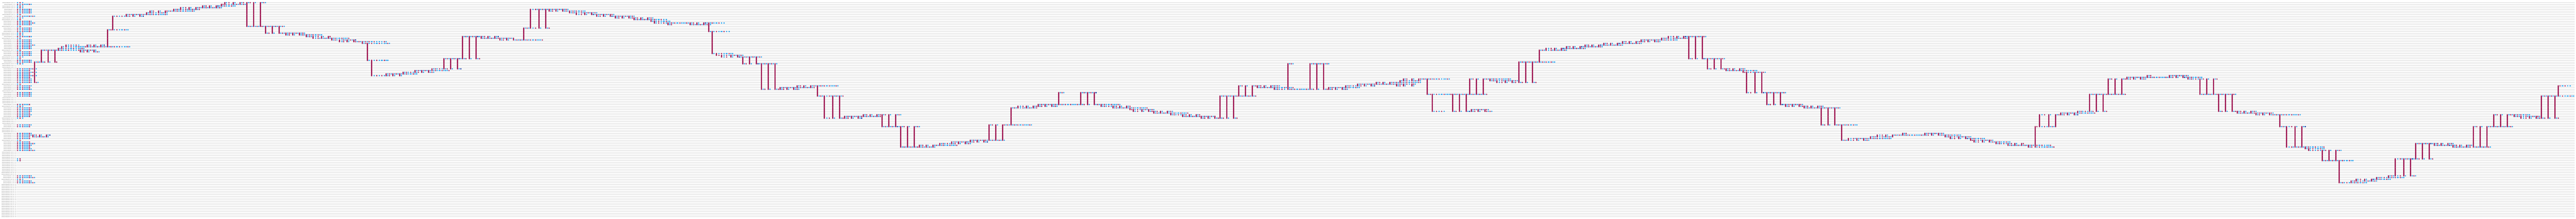

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService
import os

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
api_key = user_secrets.get_secret("IBM_API_KEY")

#api_key = os.getenv('IBM_API_KEY')
QiskitRuntimeService.save_account(channel="ibm_quantum", token=api_key, overwrite=True)


# transpiling and optimizing

# configured without AI transpiler
transpiler_ai_false = TranspilerService( 
    ai=False, optimization_level=3, backend_name='ibm_brisbane'
)

circuit_ai_false = transpiler_ai_false.run(circuit)
print(f"Transpiled without AI -> Depth: {circuit_ai_false.depth()}, CNOTs: {circuit_ai_false.num_nonlocal_gates()}")
circuit_ai_false.draw(fold=-1, output="mpl", scale=0.2)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 4.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opentelemetry-sdk to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 65.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 560.2/560.2 kB 28.8 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found ex

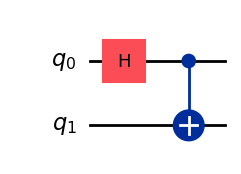

In [4]:
# Part 2: Circuit Knitting

!pip install circuit-knitting-toolbox
!pip install qiskit-serverless -U

import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_gate_map
from qiskit.quantum_info import SparsePauliOp

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from circuit_knitting.cutting import generate_cutting_experiments, cut_gates

# create a bell pair
bell_state = QuantumCircuit(2)
bell_state.h(0)
bell_state.cx(0,1)
bell_state.draw("mpl")

backend_converter.convert_to_target:INFO:2024-07-11 15:57:26,652: Gate calibration for instruction measure on qubits (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126) is found in the PulseDefaults payload. However, this entry is not defined in the gate mapping of Target. This calibration is ignored.
backend_converter.convert_to_target:INFO:2024-07-11 15:57:26,654: Gate calibration for instruction u1 on qubits (0,) is found in the PulseDefaults payload. However, this entry is not defined in the gate mapping of Target. T

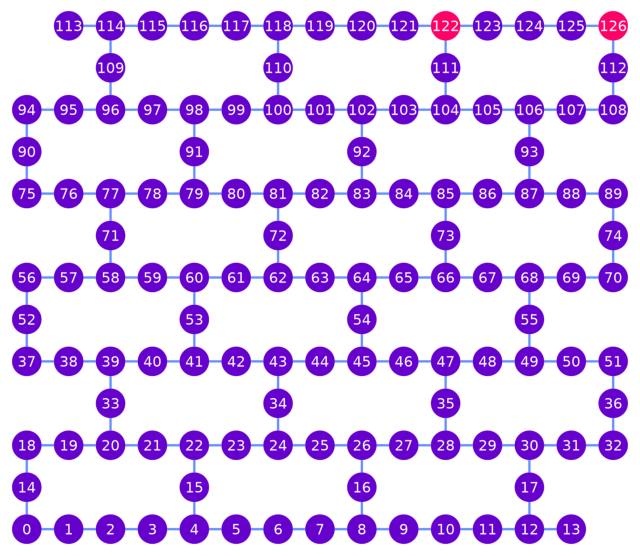

In [5]:
## If this is your first time accessing the backend
## remove # and fill your API key, and run the code
service = QiskitRuntimeService(
   channel='ibm_quantum',
   instance='ibm-q/open/main',
   token=api_key
)

#service = QiskitRuntimeService(channel="ibm_quantum")

# Specify a system to use for transpilation, DO NOT change
backend = service.backend("ibm_kyoto")

layout=[122, 126]
qubit_color = []
for i in range(127):
    if i in layout:
        qubit_color.append("#ff0066")
    else:
        qubit_color.append("#6600cc")
plot_gate_map(backend, qubit_color=qubit_color, qubit_size=60, font_size=25, figsize=(8,8))

Transpiled circuit depth:  26


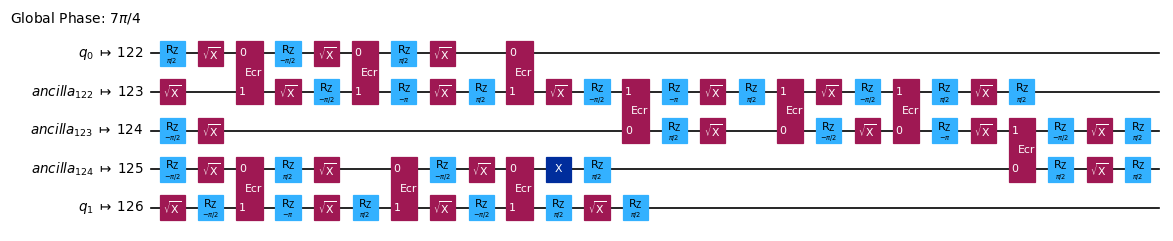

In [6]:
# transpile the circuit
pm = generate_preset_pass_manager(backend=backend, optimization_level=1, initial_layout=layout, seed_transpiler=0)
isa_qc = pm.run(bell_state)

# original circuit depth
isa_qc_depth = isa_qc.depth()
print(f"Transpiled circuit depth: ", isa_qc_depth)
isa_qc.draw("mpl", scale=0.6, idle_wires=False, fold=False)

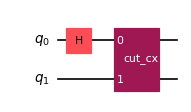

In [7]:
# Find the indices of the distant gates
cut_indices = [
    i
    for i, instruction in enumerate(bell_state.data)
    if {bell_state.find_bit(q)[0] for q in instruction.qubits} == {0, 1}
]

# Decompose distant CNOTs into TwoQubitQPDGate instances
qpd_circuit, bases = cut_gates(bell_state, cut_indices)

qpd_circuit.draw("mpl", scale=0.6)

Original circuit depth after transpile:  26
QPD sub-experiment depth after transpile:  7
Number of sub-experiments: 6


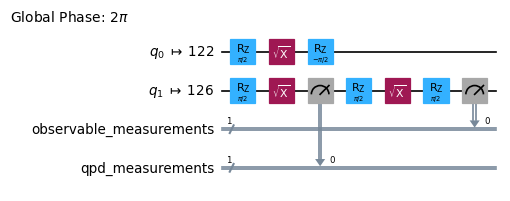

In [8]:
# replacing indices 122 and 126 with TwoQubitQPDGates
observable = SparsePauliOp(["ZI"])

# Generate the sub-experiments and sampling coefficients
sub_experiments, coefficients = generate_cutting_experiments(
    circuits=qpd_circuit, observables=observable.paulis, num_samples=np.inf
)

# Transpile the circuit
pm = generate_preset_pass_manager(backend=backend, optimization_level=1, initial_layout=layout, seed_transpiler=0)
isa_qpd_circuit = pm.run(sub_experiments[5])

# depth using circuit cutting
isa_qpd_depth = isa_qpd_circuit.depth()

print(f"Original circuit depth after transpile: ", isa_qc_depth)
print(f"QPD sub-experiment depth after transpile: ", isa_qpd_depth)
print(f"Number of sub-experiments:", len(sub_experiments))
isa_qpd_circuit.draw("mpl", scale=0.6, idle_wires=False, fold=False)

[4 3 3 3 7 7]


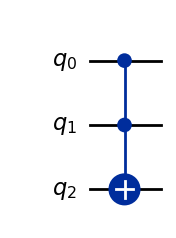

In [9]:
x = np.array([c.depth() for c in pm.run(sub_experiments)])
print(x)

toffoli_layout = [122, 124, 126]

toffoli = QuantumCircuit(3)
toffoli.ccx(0, 1, 2)
toffoli.draw("mpl")

Transpiled circuit depth:  61


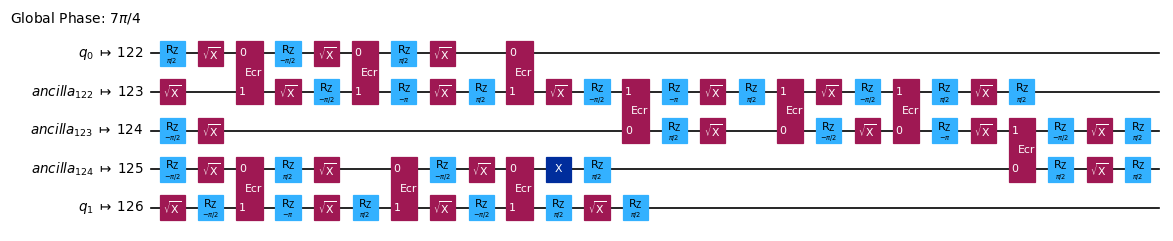

In [10]:
# circuit cutting
pm = generate_preset_pass_manager(backend=backend,initial_layout=toffoli_layout, optimization_level=1, seed_transpiler=0)
isa = pm.run(toffoli)
isa_toffoli_depth = isa.depth()

### Don't change any code past this line ###
print(f"Transpiled circuit depth: ", isa_toffoli_depth)
isa_qc.draw("mpl", scale=0.6, idle_wires=False, fold=False)

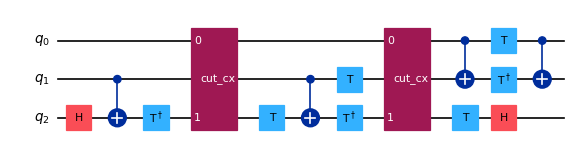

In [11]:
# Decompose the toffoli circuit
toffoli_ = toffoli.decompose()

gates_connecting_to_cut = {0, 2}
cut_indices = [
    i
    for i, instruction in enumerate(toffoli_.data)
    if {toffoli_.find_bit(q)[0] for q in instruction.qubits} == gates_connecting_to_cut
]

# Decompose distant CNOTs into TwoQubitQPDGate instances using tofolli circuit to cut
qpd_circuit, bases = cut_gates(toffoli_, cut_indices)
qpd_circuit.draw("mpl", scale=0.6)

Transpiled circuit depth:  61
QPD sub-experiment depth after transpile:  9
Number of sub-experiments: 36


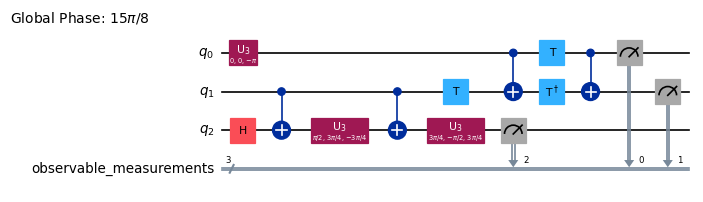

In [12]:
# set the observables
observable = SparsePauliOp(["ZZZ"])

### Write your code below here ###
# Generate the sub-experiments and sampling coefficients
sub_experiments, coefficients = generate_cutting_experiments(
    circuits=qpd_circuit, observables=observable.paulis, num_samples=np.inf
)

# Transpile the circuit
# Note: Use optimization_level=1 and seed_transpiler=0

pm = generate_preset_pass_manager(optimization_level=1, seed_transpiler=0)
isa_qpd_circuit = pm.run(sub_experiments[0])


# Depth using circuit cutting
isa_qpd_toffoli_depth = isa_qpd_circuit.depth()

### Don't change any code past this line ###
print(f"Transpiled circuit depth: ", isa_toffoli_depth)
print(f"QPD sub-experiment depth after transpile: ", isa_qpd_toffoli_depth)
print(f"Number of sub-experiments:", len(sub_experiments))
isa_qpd_circuit.draw("mpl", scale=0.6, idle_wires=False, fold=False)

9.36111111111111


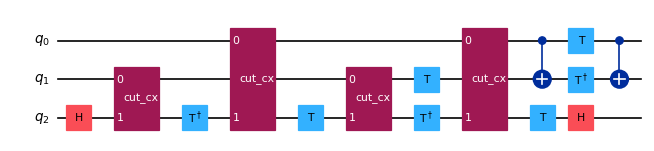

In [13]:
depth_list = [pm.run(c).depth() for c in sub_experiments]
isa_qpd_toffoli_depth_mean = (sum(depth_list) / len(sub_experiments))
print(isa_qpd_toffoli_depth_mean)

# decomposing with 2 connections this time
toffoli_ = toffoli.decompose()
gates_connecting_to_cut_1 = {0, 2}
gates_connecting_to_cut_2 = {1, 2}

cut_indices = [
    i
    for i, instruction in enumerate(toffoli_.data)
    if {toffoli_.find_bit(q)[0] for q in instruction.qubits} == (gates_connecting_to_cut_1)
    or {toffoli_.find_bit(q)[0] for q in instruction.qubits} == (gates_connecting_to_cut_2)
]

qpd_circuit_2, bases = cut_gates(toffoli_, cut_indices)
qpd_circuit_2.draw("mpl", scale=0.6)

QPD sub-experiment depth after transpile:  5
Number of sub-experiments: 1296


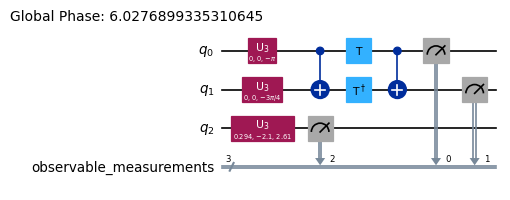

In [14]:
# set the observables
observable = SparsePauliOp(["ZZZ"])

### Write your code below here ###
# Generate the sub-experiments and sampling coefficients

sub_experiments_2, coefficients = generate_cutting_experiments(
    circuits=qpd_circuit_2, observables=observable.paulis, num_samples=np.inf
)

# Transpile the circuit
# Note: Use optimization_level=1 and seed_transpiler=0

pm_2 = generate_preset_pass_manager(optimization_level=1, seed_transpiler=0)
isa_qpd_circuit_2 = pm_2.run(sub_experiments_2[0])

# Depth using circuit cutting
isa_qpd_toffoli_depth_2 = isa_qpd_circuit_2.depth()


### Don't change any code past this line ###
print(f"QPD sub-experiment depth after transpile: ", isa_qpd_toffoli_depth_2)
print(f"Number of sub-experiments:", len(sub_experiments_2))
isa_qpd_circuit_2.draw("mpl", scale=0.6, idle_wires=False, fold=False)

9.36111111111111


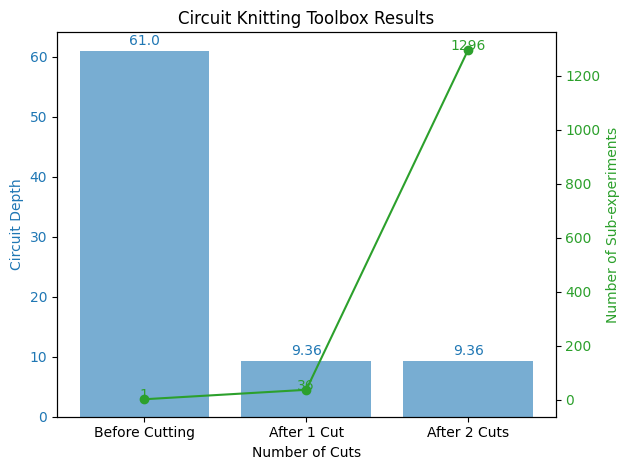

In [15]:
depth_list_2 = [pm_2.run(c).depth() for c in sub_experiments]
isa_qpd_toffoli_depth_2_mean = (sum(depth_list_2) / len(sub_experiments))

print(isa_qpd_toffoli_depth_2_mean)

# Number of sub-experiments
num_sub_experiments_1_cut = len(sub_experiments)
num_sub_experiments_2_cut = len(sub_experiments_2)

# Data for plotting
categories = ['Before Cutting', 'After 1 Cut', 'After 2 Cuts']
depth_values = [isa_toffoli_depth, isa_qpd_toffoli_depth_mean, isa_qpd_toffoli_depth_2_mean]
num_sub_experiments = [1, num_sub_experiments_1_cut, num_sub_experiments_2_cut]

# Create figure and axis
fig, ax1 = plt.subplots()

# Plot depth values
color = 'tab:blue'
ax1.set_xlabel('Number of Cuts')
ax1.set_ylabel('Circuit Depth', color=color)
bars = ax1.bar(categories, depth_values, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color)

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', color=color, fontsize=10)

# Create a second y-axis to plot the number of subexperiments
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Number of Sub-experiments', color=color)
ax2.plot(categories, num_sub_experiments, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Add value labels on points
for i, num in enumerate(num_sub_experiments):
    ax2.text(i, num + 0.1, num, ha='center', color=color, fontsize=10)

# Add titles and labels
plt.title('Circuit Knitting Toolbox Results')
fig.tight_layout()  # Adjust layout to make room for both y-axes

# Show plot
plt.show()